# COGS 118A - Final Project

# Predicting Song Views using Embedded Features

## Group members

- Mohammad Alkhalifah
- Dhaval Jani
- Raunit Kohli
- Saarthak Trivedi

# Abstract 

The goal of this project is to develop a way of predicting views based on various features in a song based dataset, namely lyrics, title, artist, tags, and age in an effort to assist musical recommendation systems. The used dataset contains the metadata of over five million individual songs collected from Genius in 2022, a website where music information and lyrics are provided. Using exploratory data analysis, we seek to explore how Neural Networks and Extreme Gradient Boosting compare to each other when performing both Regression and Classification tasks. We first experiment with different embedding and encoding techniques to process the data into a manner that allows us to analyze the accuracy of all models fairly. We then build and tune the hyper-parameters of two Reccurent Neural Networks, fit best for their specific task. After finding Classification is much more effective in RNN's, we perform similar experiments with XGBoost. Overall, we find that Classification is much more effective for song view prediction as compared to Regression, and further that Boosting techniques are more effective than Neural Networks. 

# Background

Music platforms such as Spotify and Apple Music have been employing the use of recommender systems for a years now. Built on a series of algorithms, these platforms will maintain a massive database of songs and their attributes, and recommend certain music selections to individuals based on past music taste and popular streams. However, with these algorithms getting more advanced, song recommendations are getting very specialized based on clustering and clouds of similarity<a name="recsystem"></a>[<sup>[1]</sup>](#recsystem). 

Song popularity is constantly changing and is usually based on all-time views but also number of shares, pre-saves, and recent popularity.<a name="popularity"></a>[<sup>[2]</sup>](#popularity). When recommeding new music, platforms will try to recommend new music uploads to build a profile on individuals and spread releases to gain popularity. Yet, because of the recommender algorithm basing profiles on clustering techniques, and the fact that popularity of a song is measured by more factors than just all-time views, it's possible that the songs recommended as popular are in fact not the most popular songs<a name="popularity"></a>[<sup>[2]</sup>](#popularity). 

A series of studies have been completed on the topic of music recommender systems and how they choose the popular songs that are recommended. One specific paper shows that in the United States, especially songs in languages other than english or from non-American artists are less likely to be recommended to individuals even if all other attributes of the song's metadata match up with the user's preferences<a name="survey"></a>[<sup>[3]</sup>](#survey). This means that recommender systems for music need to be improved so that total views has a more balanced influence on music choices. 

Usually when employing machine learning for a task, it is clear whether the problem would require classification or regression. However, this case presents some ambiguity in terms of what approach to take. Regression would give us a precise prediction on the number of views a song gets, while classification would categorize songs into different classes based on views and give us a range of values that the view count could be in. The choice between regression and classification for song view prediction depends on the granularity and interpretability required for the problem.

Having a good algorithm for predicting the view count of a song based on its other features allows recommender systems to more effectively suggest relevant songs. It can also help music artists and record labels better understand the features necessary in a song for it to be popular.

<!-- __Insert background info here about regression vs classification__ -->

# Problem Statement

The problem at hand is to develop a machine learning model that accurately predicts the range of the number of views/plays a song will receive based on various factors including lyrics, title, artist, tags, and year. The goal is to leverage a database containing over 3.3 million english songs and their corresponding play/view counts to build a robust predictive model. We can express it in mathematical terms by either defining the target variable (number of views/plays or ) as a continuous numerical value or discrete bins of ranges. The model's predictions can then be either a quantified estimate or plays, or a category of range of views. 

In order to best predict the views, we can perform either regression or classification to determine a song's viewing potential. Breaking up the problem into two distinct tasks and then comparing their performance, we can train and evaluate multiple models using our large dataset, observing the predicted ranges against the actual counts to determine its efficacy. Furthermore, the model's performance can be measured and compared across different subsets of the dataset or on new unseen songs to validate its generalizability. The models can be trained and evaluated multiple times using various subsets of the dataset or with different feature combinations to explore different hypotheses and improve its predictive capabilities.

# Data

The dataset we will primarily be using is a dataset found from kaggle with stores songs and their metadata from genius  (https://www.kaggle.com/datasets/carlosgdcj/genius-song-lyrics-with-language-information). The format is a csv file with over five million observations. There are 11 different features for each data point. Each observation refers to a single song, and the features are the title, tag (aka genre), artist name, year, features on the song, the genius identifier, and three seperate language features. Out of all the features, the critical ones include the title, artist name, features, year, and language as these will all aid heavily in helping predict the view counts. The datapoints also include the viewcount of the song, enabling supervison with these counts as labels. The features are represented in the dataset as mostly strings and integers, however we intend to use one-hot encoding and label encoding to convert categorical features like genre, artist, and language into numerical format. For the lyrics, we will employ Natural Language Processing (NLP) techniques, like word embeddings, to extract meaningful features. Finally, for numerical features, we will apply standard scaling to bring them to a similar scale.

The below code is used to read in the raw zipped file with the data we got from Kaggle. We remove uncessary columns and drop duplicates. We drop the surplus columns for language, and only include the main language column. Through some minor EDA we decide to isolate the data to only include english songs (the reason for this is that in order for titles and lyrics to be used as a feature for predicting view count, we need to have the encodings present the same semantic information. This requires us to translate all the lyrics and titles into a single language. Doing so is currently unfeasable, which is why we will begin with just english songs). We then compress the dataframe to a feather format for future use.

<img src="imgs/raw_dataframe.png" />

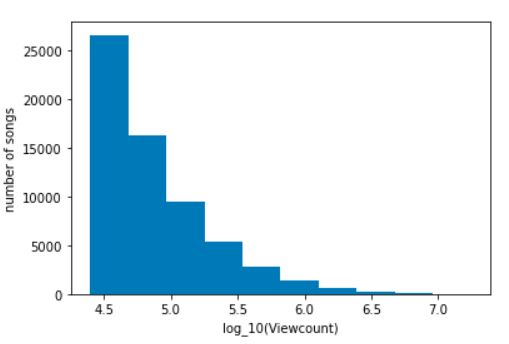

In order to get another look at some of the data, we can make some plots. We see the spread of the various genres in the data:

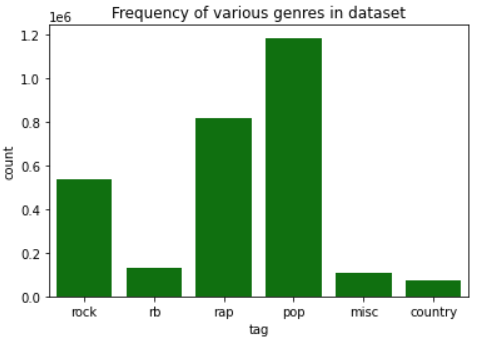

Further, we can look at the data in terms of views plotted against the year of the song's release date, where we see more views correlated to more recent releases.

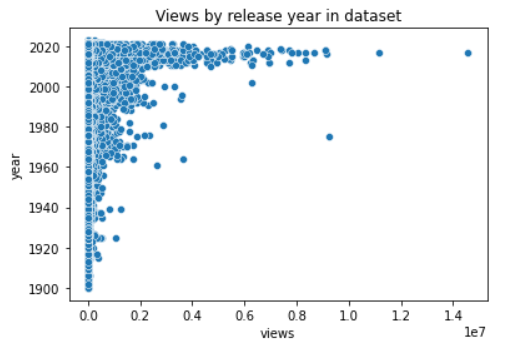

As we can see above, the data contains music that was dated to years before the invention of technology. Some of these songs are in fact valid, mostly because they are verses from religious texts or ancient scripts and are therefore dated to back then. However the majority of these songs are just incorrectly labeled. Therefore, we will remove all songs that are dated before 1900 and after 2023. We will then convert the year to the song age since 2023 and then delete the year column.

# Proposed Solution

The proposed solution for this problem is to employ multiple machine learning models attempting two supervised tasks, specifically regression and classification, to predict bounds for song views based on given song features. Our models will be selected for their standard performance on high-featured dataset and will leverage the cleaned dataset of over 3.3 million english songs, which include the features of lyrics, title, artist, tag, and release age. 

Before training any models, we will first pre-process our data to best fit both regression and classification tasks. We will use HuggingFace to explore three distinct Text Semantic Analyis Tokenizer-Embedder Models for embedding the lyrics and titles of each song. In order to tune to the best Embedder model, we will validate on simple KNN's (simple referring to subset of data) to determine the most effective lyrical embedder. We will then encode the artists and tags. And finally we will process the years released. For regression, we will keep our Views as continuous numbers, implementing a specific allowed error rate for prediction. However, for classification, we will discritize our Views into 20 logistically-binned categories so our Models can predict classes rather than continuous counts. 

We will then employ machine learning algorithms designed to handle large feature inputs because our dataset after embedding and encoding will grow exponentially from its raw form. The three Algorithms we will experiment with are Recurrent Neural Networks (RNN's), K-Nearest Neighbors (KNN), and Extreme Gradient Boosting (XGBoost). These algorithms are specifically best for large datasets due to their feature and datapoint weighting, as well as their potential to handle complex, non-linear relationships, and mitigate overfitting. Our models will be implemented using PyTorch and Tensorflow for the RNN, XGBoost for the boosting algorithm, and Scikit Learn for KNNs. 

The performance of the models will be evaluated using metrics subject to the task at hand, and also the overall accuracy. For regression, our loss will be calculated using Mean Square Error (MSE), while for classification we will calculate loss using Cross Entropy Loss. For our NN's we will build different Networks based on layers that are commonly utilized for text analysis and assess model performance and robustness through a series of Train and Validation tests. For XGBoost and KNN, we will perform k-fold cross validatiion through a hyper-parameter search using either GridSearch or RandomizedSearch. We will compare regression to classification through model accuracy, calculated as a non-reguarlized ratio of correct predictions. 

# Evaluation Metrics

As mentioned previously, we have supervision in the form of viewcount labels associated with each datapoint in the dataset. Since the predicion and target are numerical values for the regression task, we use the mean squared error (MSE) between the predictions and labels to measure the accuracy. 

$$MSE = \frac{1}{N}\sum_{i=1}^{D}(\hat{y}_{i}-y_{i})^2$$

Where $\hat{y}_i$ are the predictions, $y_i$ are the labels for the $i$th datapoint.

For the classification task, we do a multiclass calssification with 20 classes. To measure the quality of these predictions, we compute a cross entropy loss, which gives us an idea about the difference in the probability distribution of the ground truth and our predictions. It can be computed as follows:

$$-\sum_{c=1}^My_{o,c}\log(p_{o,c})$$

Above, $M$ is the number of classes (20 in our case), $\log$ is the natural logarithm, $y$ is a binary indicator (0 or 1) if class label $c$ is the correct classification for observation $o$, and $p$ is the predicted probability that $o$ belongs to class $c$.

For both Neural Networks and XGBoost, we measured the loss of our regression with Mean Square Error and we measured the loss of our classification with Cross Entropy. Our overall comparison between the two will be un-reguarlized accuracy rate. 

# Results

We performed a lot of Exploratory Data Analysis, pre-processing experimentation, and training exploration for our models. The majority of our most-effective code is summarized in two dynamically changing notebooks: 
- https://github.com/COGS118A/Group036-SP23/blob/main/Full_dataset_processing.ipynb
- https://github.com/COGS118A/Group036-SP23/blob/main/Model_Training-FULL_MAIN.ipynb

Due to the size of our input data, we cannot run full notebooks, nor can we efficiently upload data. Please reach out to our Github members to request access to the data. 

### Pre-processing our Data

For the full notebook for data pre-processing, please refer to: https://github.com/COGS118A/Group036-SP23/blob/main/Full_dataset_processing.ipynb

For both regression and classification with our models, we need to transform our data into numerical quantifications. As mentioned above, we need a text analysis embedder for our lyrics and titles. We will utilize HuggingFace to tokenize and word-embedd the lyrics. There were three trained HuggingFace models that we wanted to experiment with based on the data that these models were fine-tuned on. The final embedder we used was 'all-MiniLM-L6-v2'. Below is the code we used to embed lyrics:

<img src="imgs/embeddedAM.png"/>

Overall, after embedding both lyrics and titles, we increase our feature space to 512 lyrical columns and 36 title columns, each feature column corresponding to a token with a weight for its importance. 

Next we needed to encode the artists and tags. Tags are easy to encode, as there are only 6 discrete tags so we can easily one-hot encode these. For artists however, one-hot encoding would make the size of the data enormous, as we would be in a very high-dimensional feature space given there are 428304 unique artists represented. We would need to instead label-encode the artists, to retain a single feature column. In order to ensure that the labels have ordinal power over the models, we will need to first sort the datapoints by views, then label-encode the artists, and then randomize again. 

Then, given that we want to run both regression and classification tasks and also that our views range from 0 to tens of millions, we will need to create ranges for our views. Through a lot of EDA, we decided it would be best to create 20 discrete bins of ranges for our views. We needed to ensure that the bins were essentially equal in size without skewing too far to either side of the overall ranges.

Finally, now that we had discritized our views into 20 categories, we needed to also encode these categories for our classification tasks. We one-hot encoded the views, then combined all the data and performed a massive train-test split to create multiple compressed feather files. 

### Neural Networks for Regression

After having cleaned and pre-processed our data, we then begin training our models. We started with writing a framework for training and testing Reccurent Neural Networks using PyTorch (the full process can be found at the notebook linked here: https://github.com/COGS118A/Group036-SP23/blob/main/Model_Training-FULL_MAIN.ipynb)

We first read in our training data, which had over 2.6 million data points with 500+ features. We then split the data into their own training and validation sets because running cross-validation or a standardized hyper-parameter search would be unfeasable for a Neural Network. 

We needed to then write a Network best fit for regression. Note that for text models, we had no need for convolution or pooling layers as our feature space was sparse enough to require the impact of each column of lyrical analysis. We converted all our dataframes into PyTorch Tensors and defined the Dataset and Loader classes along with the loss function and optimizer. 

After running a training and testing loop on the GPUs, we found the regression Neural Network had a fascinating 0.0% accuracy. We noticed that due to the linear layers and activation functions utilized by the Regression Network, our network was predicting float values from a distribution for views. Since our views are continuous in the Regression model, we found that it was extremely rare for the model to predict exactly the right category. 

<img src="imgs/reg_nn_result.png" width='300'/>

### Neural Networks for Classification

Having seen the regression is extremely ineffective for a model as complex as RNN's, we moved on to creating a classification model with a similar Network. However, distinct changes were made to the model to fit it for classification: 

Notice the differences between this model and the Network from regression. Firstly, since the number of output categories are a discrete set of 20, we can have much higher dimensional transformations throughout the linear layers. Further, the final activation function of the Layer is softmax. This is by design, as for classification our Network will want to output a distribution of probabilities over the 20 discrete cases, therefore we will want to apply a non-linear distribution function over the values to best compare to our label. Below is the testing loop mentioned above, to how how we analyzed and assessed the model performance on our validation set.  

As we can see, the loss function is set to CrossEntropyLoss. The test loss (test_loss1) is computed by calculating the CrossEntropyLoss between the predicted views (pred1) and the true views (views) of 550k testing data points. The accuracy of the predictions is also calculated (correct1) by comparing the predicted class labels with the true class labels for the view. Rerunning this multiple times also gives an accuracy that fluctuates between 14 and 18%. Next, we created a confusion matrix for this classification model, shown here:

<img src="imgs/cofusion_matrix.png" width='500' />

This confusion matrix shows us that the neural network has a tendency to classify a data point as category 4 over the others. We have 20 different classification categories rather than just a binary true or false, and thus the confusion matrix is much larger. We can also contruct a neural net ROC-AUC curve to see how this network performs, and we see the following plot:

<img src="imgs/roc_auc.png" width='500'/>

As we can see, this graph indicates that this neural network is not much better than a random classifier, likely due to the fact the neural network is only two layers and primarily linear. We could address this by making the network deeper since more layers generally allow for the learning of hierarchical and more abstract features, enabling the network to capture more relationships between attibutes in the data. Further, many real-world problems such as this one (predicting views based off song metdata) require non-linear decision boundaries to be accurately modeled in the first place. Between the two error metrics, the CrossEntropy Loss provides much more information about the accuracy of our neural network, whilst the confusion matrix is a helpful visual.

### XGBoost for Classification

After seeing that our Neural Networks had very high loss and low accuracy, we move on to estimating Extreme Gradient Descent (XGBoost). We import the xgboost library to assist in implementing our Model. 

We started with an XGBoost Regression model. However, despite countless efforts to tune the hyper-parameters (see notebook above), we ran into the same problem as the NNs. Specifically, with Regression our model needs to predict a continuous label which is much more difficult given the nature of our data. We then moved on to Classification.

For the XGboost classification model, we first perform a 3-fold cross-validation to find the optimal combination of hyperparameters for the XGboost classifier. The parameter search is done over the following parameters:

The random search helps in finding the optimal combination of hyperparameters from the specified parameter grid for the XGBoost classifier. The code then evaluates the accuracy of the best-tuned model on the test data, and we get an accuracy of ~0.2599.

We also generate a visual representation of the feature importances of the XGBoost model, giving us insight into the relative importance of different features in the model. 

<img src="imgs/features xgboost.png" />

Notice, that the artist of the song plays an extremely significant role in the number of views a song gets.

The classifers (XGBoost and Neural Network), yield better results than the regressors, and the above tuning confirms that XGBoost is a better classifier (especially for this dataset). 

Finally, given our assesment of algorithms, we load in the entirety of our training data and train the chosen model, specifically an XGBoost Classifier with the afforementioned hyperparameters and test it on our testing set. 

# Discussion

### Interpreting the result

<!-- The overall results of our exploration revealed a variety of  -->
From our results, we can infer that classification works best for this type of problem where we want to be able to guage the popularity of a song by predicting the number of views it would get. Specifically, we found that XGBoost is better than neural networks for this purpose.

Our experiments with regression revealed that modeling this problem with a regression objective is ill-posed. We saw that our model consistently yielded 0% accuracy (measured in terms of mean squared error). The cause of this is the fact that linear regression predictins discrete floating point values, which is different from what our data model required. Thus, the better option is to represent the views as classes based on the ranges they lie in to model the popularity of the song and then optimizing a model with classification in mind.

For XGBoost, we see that the CrossEntropy loss is the higher than neural networks, and consequently the prediction accuracy in XGBoost is about 26% while our neural network only gave us 14% - 18% accuracy. This means that the probability distribution of the outputs from XGBoost is closer to ground truth than the output from the neural networks. We also found that the neural network does not increase accuracy enough to justify the expensive training times, as it is not much better than chance. We could potentially address this by making the network more complex to handle non-linear boundaries, or making it deeper to learn more abstract features from the data.

### Limitations

The way the data is provided is one limitation, as even after comprehensive exploratory data analysis, there are issues such as one artist being represented multiple times and thus when we encode them they show up as different artists. An example is "Kendrick Lamar" vs "Kendrick Lamar Live". For this reason, we had to drop the features column and also were unable to effectively clear bias from the Label Encoder for artists. 

Further, we could not succesfully use KNN on a lot of the data since it is such a large dataset, and KNN requires the entire set to be loaded into memory so it can compare datapoints to their neighbors. 

The largest issue we were limited by was the lack of computational power to manipulate and train on such an expansive dataset. While large data is useful for ML, we needed multiple GPU's and significant memory to run our models and fo this reason we couldn't test all our code effectively. Further, our notebooks were scattered due to having to perform simple EDA or training tasks in many parts, which could also accidently invite overlap between chunks of data. 

### Ethics & Privacy

While the goal of this project is predict the views, ultimately it might be used in recommendation systems or by artists. Hence, it's important to consider potential ethical issues and implications related to data privacy, as well as possible unintended consequences. If the model prioritizes songs predicted to have high view counts, it might stifle diversity and reinforce a popularity echo chamber. To address this, we could consider incorporating some measure of diversity or novelty into our model while addressing these concerns. One potential ethical concern is the possibility of bias in our model. For instance, if the training data is skewed towards certain genres, languages, or artists, our model may inadvertently favor those groups when predicting views. We'll carefully examine our dataset for such biases and consider techniques such as resampling or weighting to mitigate them. We will ensure transparency by documenting our methodology, acknowledging limitations, and being open to feedback.

### Conclusion

From our experiments we found that it is better to pose the problem of view count prediction for songs as a classification problem rather than a regression problem. We also encountered long training times for regression, with less accurate results, which shows that the classification approach is better suited for this task. The XGBoost classifier gave us the best results for this classification problem. We also noticed that, although we had ample data, simple neural networks were not able to learn enough information to make high quality predictions. This could fit into the context of other work in the field of song data analytics and song recommendation by giving insight into which features are most significant in increasing or decreasing the popularity of the song. Some future work could be done to come up with better feature representations and combinations in order to help both neural networks and classical mathematical approaches make more accurate predictions.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem


# Exceptional Final Project

Our Final Project effectively explored different Machine Learning techniques throughout the effort to predict song views given a multitude of lyrical and logistical features. 

We feel our project exceeded expectations and is subject to additional Extra Credit for two points: 
- (a) We didn't just explore and train different models for a single task but rather went through an exploratory and experimental process to compare two different tasks, specifically regression and classification, and how they apply to complex model
- (b) Our project utilized an enormous dataset, over 3.3 million datapoints after cleaning, each datapoint with over 500 features after pre-processing. Analyzing and utilizing this dataset is characterized as big data analytics and manipulating this data for model training and validation is a difficult machine learning complication which we feel we tackled head-on. 

Please refer to our additional Notebooks linked in our Github to see just a portion of our cleaned and working code that showcases the effort put into training our models. 